# Importing all the Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

# Importing the Datasets

In [2]:
# Importing the training dataset
df_train = pd.read_csv("TRAIN.csv")

# Importing the test dataset
df_test = pd.read_csv("TEST_FINAL.csv")

## Let's check the dataset using **info()** command

In [63]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [66]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22265 entries, 0 to 22264
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             22265 non-null  object
 1   Store_id       22265 non-null  int64 
 2   Store_Type     22265 non-null  object
 3   Location_Type  22265 non-null  object
 4   Region_Code    22265 non-null  object
 5   Date           22265 non-null  object
 6   Holiday        22265 non-null  int64 
 7   Discount       22265 non-null  object
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [61]:
df_test.head(2)

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Year,Month
0,T1188341,171,S4,L2,R3,2019-06-01,0,No,2019,06
1,T1188342,172,S1,L1,R1,2019-06-01,0,No,2019,06


In [60]:
df_train.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales', 'Year', 'Month'],
      dtype='object')

## Let's describe the dataset

In [5]:
df_train.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


We can see that the max value in sales is way higher, this may be an indication of the presence of outliers.

Let's use boxplot to check if there are any outliers in the sales

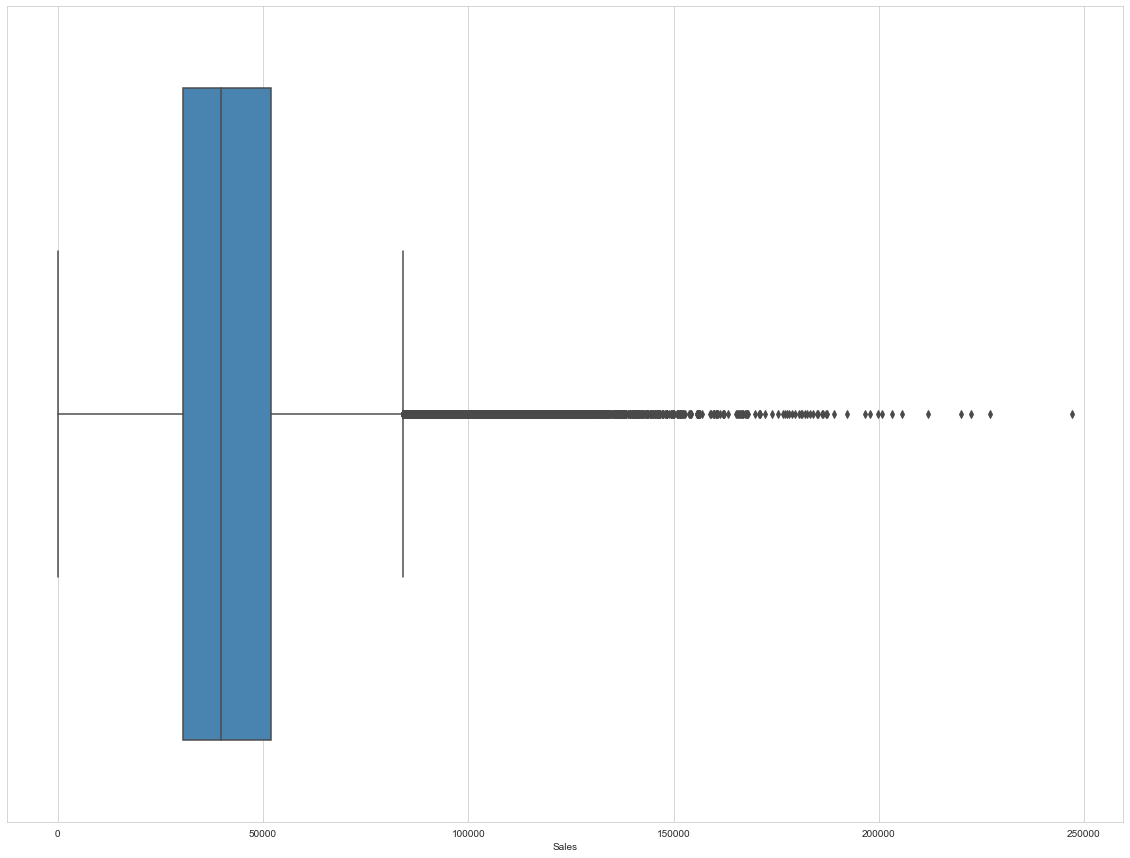

In [4]:
plt.figure(figsize=(20,15))
sns.set_style('whitegrid')
sns.boxplot(x=df_train.Sales, palette='Blues_d');
plt.show()

Yes, as we can see that there are outliers in the sales features. Let's remove them.

In [6]:
# using quantile method to ckeck the interval of data
df_train['Sales'].quantile(0.999)

140324.33700000256

In [7]:
df_train = df_train[df_train['Sales'] < 142000]

In [8]:
df_train.shape

(188172, 10)

## Now let's check if there are any null/nan values in the dataset.

In [69]:
df_test.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
dtype: int64

There are no null values on training dataset.

# Exploratory Data Analysis

In [22]:
# Let's explore the distribution of sales over time.
df = df_train.copy()
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index('Date')


df['month'] = df.index.month
df['year'] = df.index.year
df['day'] = df.index.day

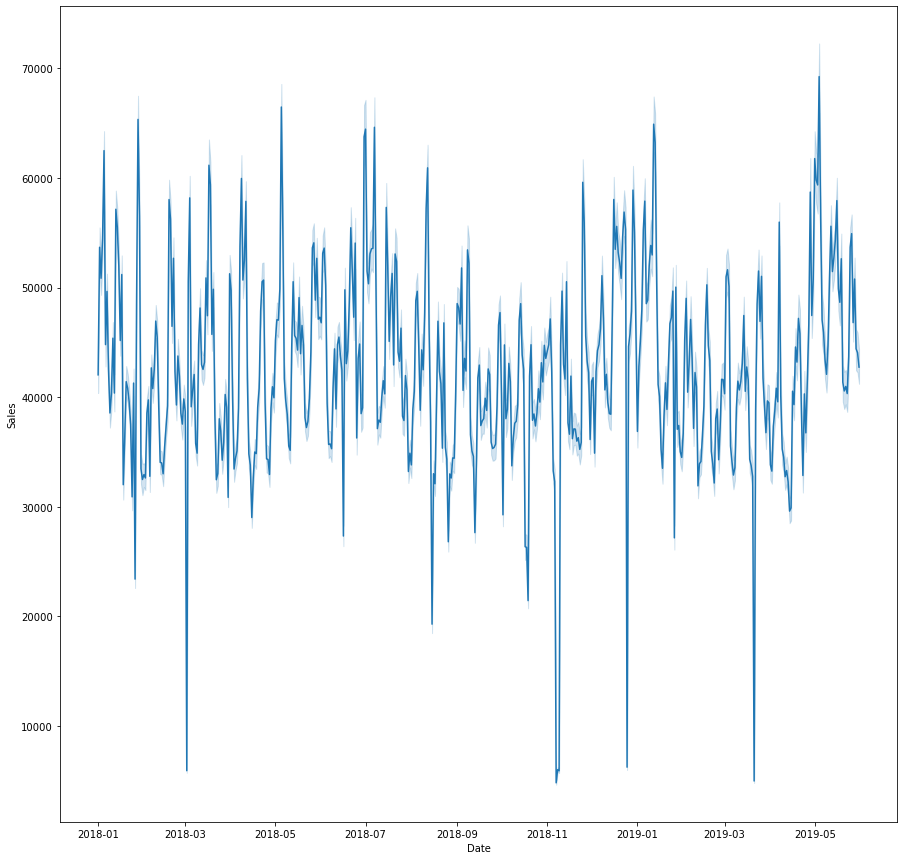

In [23]:
# Let's view the sales distribution using lineplot
plt.figure(figsize=(15,15))
sns.lineplot(x=df.index, y='Sales', data=df);
plt.show()

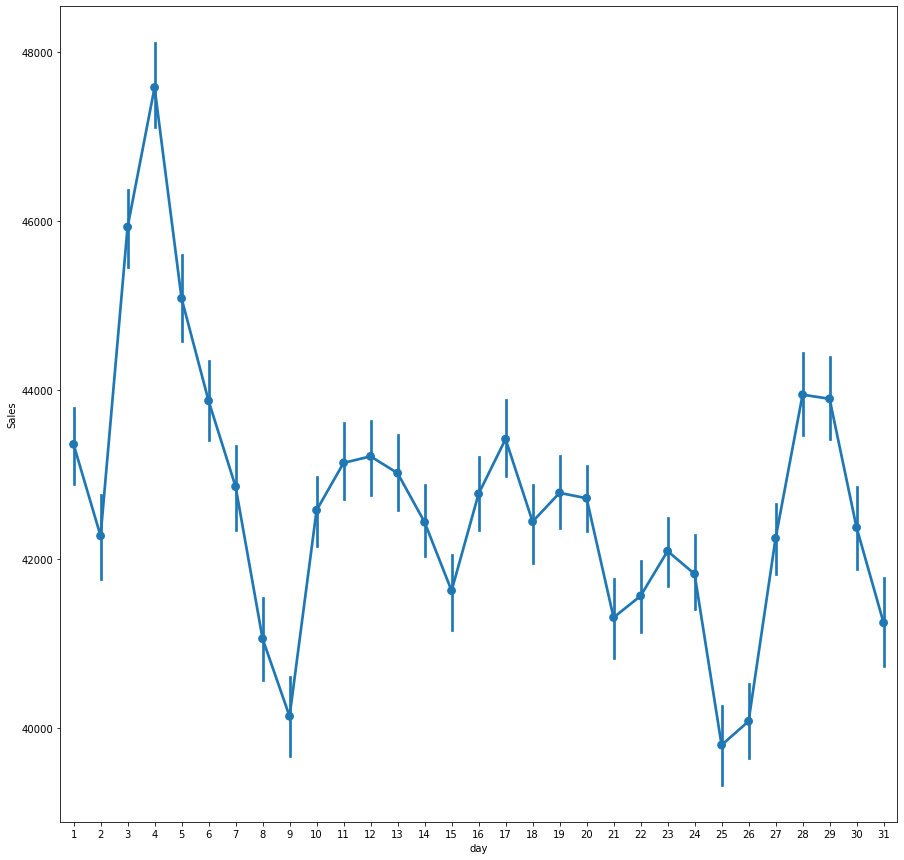

In [24]:
# Using pointplot
plt.figure(figsize=(15,15))
sns.pointplot(x='day', y='Sales', data=df);
plt.show()

We can see that the sales are higher during the initial days of a month. 

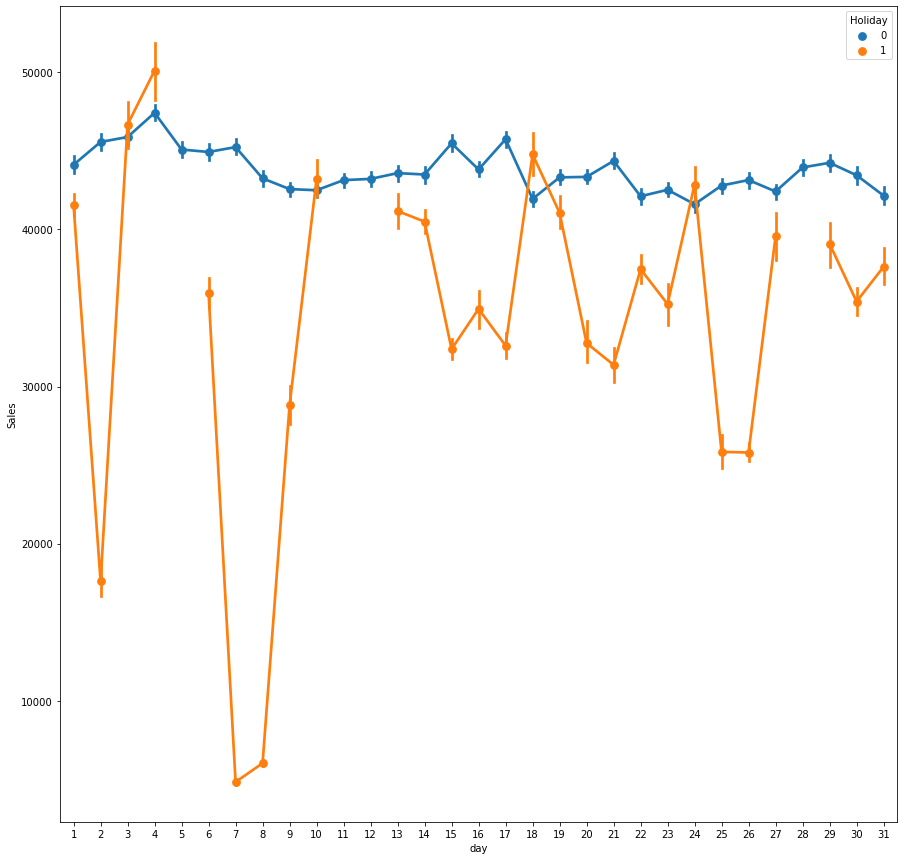

In [25]:
# Let's check the variation of sales as per holidays and working days.
plt.figure(figsize=(15,15))
sns.pointplot(x='day', y='Sales', data=df, hue='Holiday');
plt.show()

## Let's explore the sales as per other given features in dataset

In [11]:
# Using groupby to check the sales as per store_type
store_type_sales = df_train.groupby(['Store_Type']).sum()
store_type_sales

,Store_id,Holiday,#Order,Sales
Store_Type,,,,
S1,15240060,11696,5149577,3.343866e+09
S2,5910780,3808,1169502,7.955308e+08
S3,4155864,3264,1824495,1.165658e+09
S4,9159516,6052,4702286,2.752946e+09


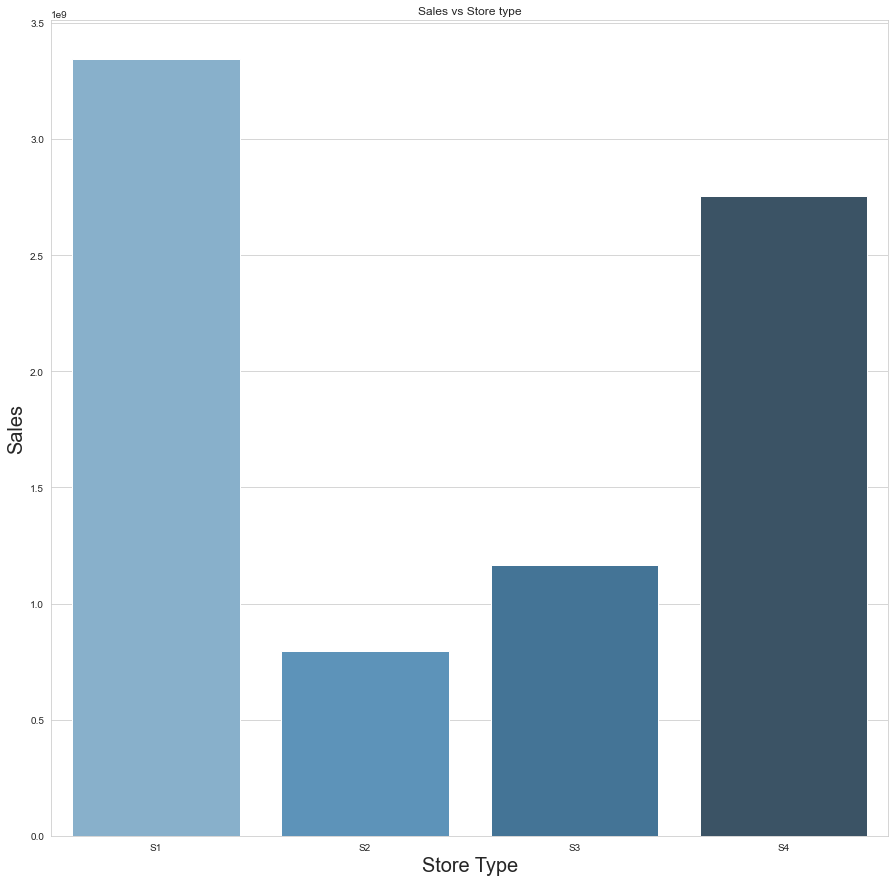

In [18]:
# Visualize the number of sales vs the store type
plt.figure(figsize=(15,15))
sns.set_style('whitegrid')
sns.barplot(x=store_type_sales.index, y=store_type_sales['Sales'], palette='Blues_d');
plt.title("Sales vs Store type")
plt.xlabel('Store Type', fontsize = 20)
plt.ylabel ('Sales', fontsize = 20)
plt.show()

We can see that store type S1 has the highest sales value followed by S4, S3 and S2 respectively.

 ## Let's see the variation of sales as per location type and region type as well.

In [19]:
# Using group by method
locaton_type_sales = df_train.groupby(['Location_Type']).sum()
locaton_type_sales

,Store_id,Holiday,#Order,Sales
Location_Type,,,,
L1,14968644,11220,5556742,3.529359e+09
L2,8788512,6392,4600675,2.872964e+09
L3,5810160,3944,1590881,9.897865e+08
L4,2389080,1428,513475,3.149745e+08
L5,2509824,1836,584087,3.509163e+08


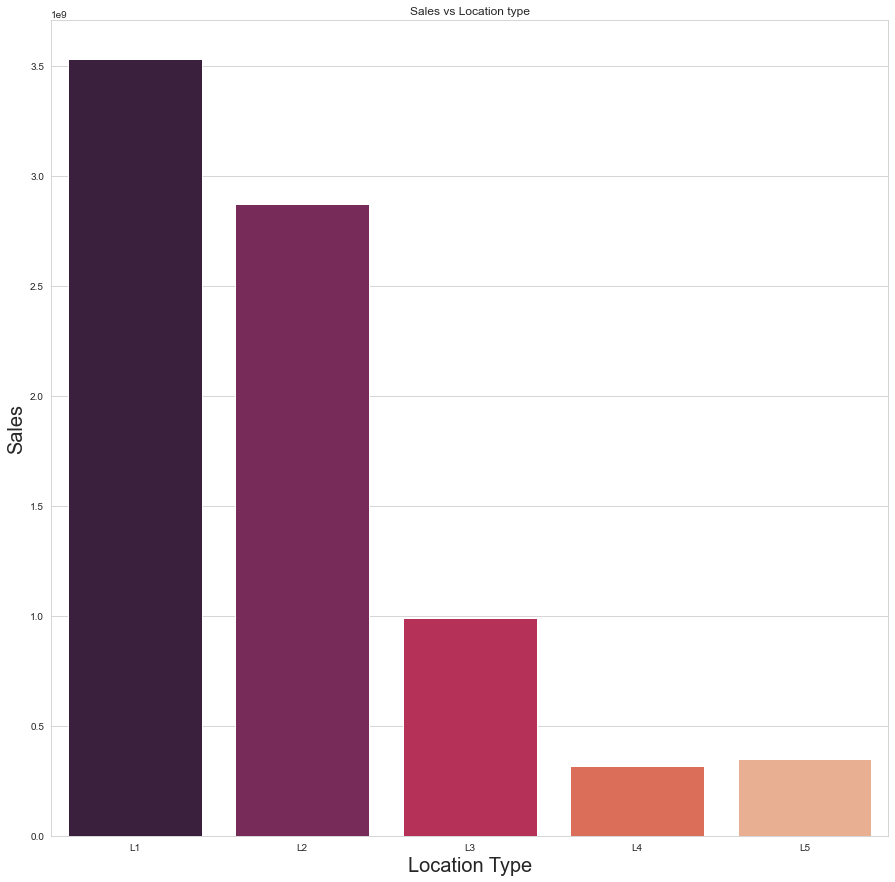

In [20]:
# Plotting the graph for visualizing the sales for different locations.
plt.figure(figsize=(15,15))
sns.set_style('whitegrid')
sns.barplot(x=locaton_type_sales.index, y=locaton_type_sales['Sales'], palette='rocket');
plt.title("Sales vs Location type")
plt.xlabel('Location Type', fontsize = 20)
plt.ylabel ('Sales', fontsize = 20)
plt.show()

We can see that location L1 has the highest sales followed by L2, L3, L5 and L4 respectively.

In [21]:
region_code_sales = df_train.groupby(['Region_Code']).sum()
region_code_sales

,Store_id,Holiday,#Order,Sales
Region_Code,,,,
R1,12854592,8432,5094794,2.992243e+09
R2,9869532,7140,3402429,2.170172e+09
R3,7376220,5848,2834847,1.870205e+09
R4,4365876,3400,1513790,1.025381e+09


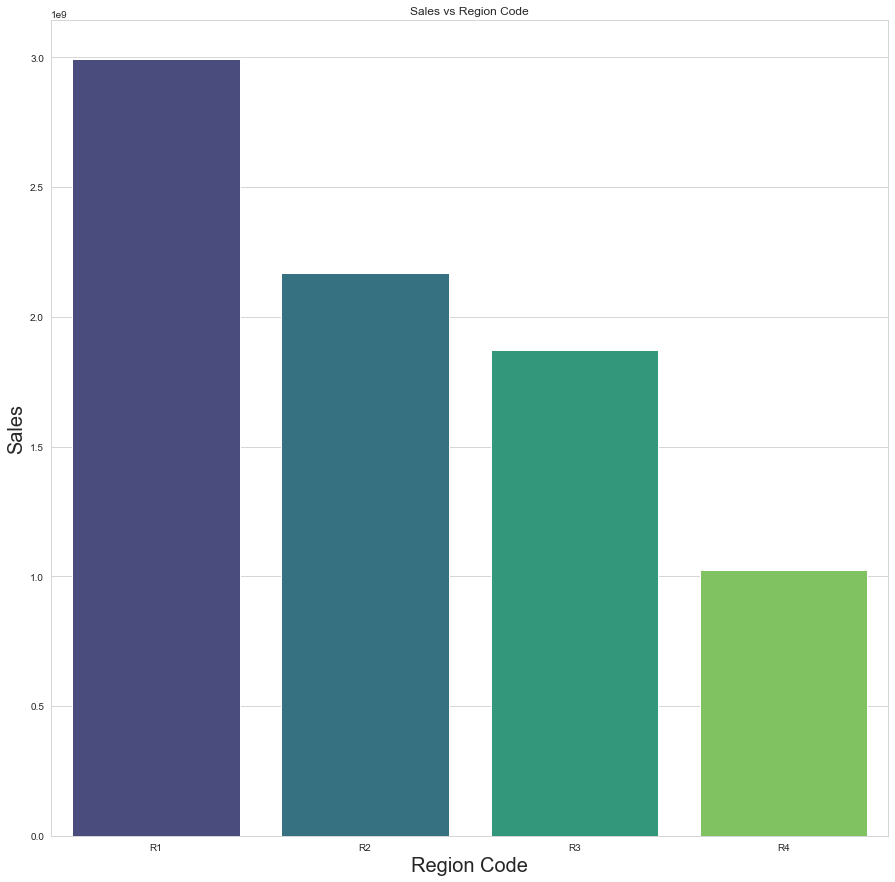

In [22]:
# Plotting the graph for visualizing the sales for different locations
plt.figure(figsize=(15,15))
sns.set_style('whitegrid')
sns.barplot(x=region_code_sales.index, y=region_code_sales['Sales'], palette='viridis');
plt.title("Sales vs Region Code")
plt.xlabel('Region Code', fontsize = 20)
plt.ylabel ('Sales', fontsize = 20)
plt.show()

We can see that R1 has the highest sales value followed by R2, R3, R4 respectively.

We can see that sales are generally constant during the working days, lying between 40k to 50k. It mostly varies during holidays.

# Data Preprocessing

## Let's separate the 'Date' column into year and month column.

In [10]:
# Let's convert the Date object into string datatype.
df_train['Date'] = df_train['Date'].astype(str)

In [12]:
# Convert the Date feature into numpy array for joining them into an array
date = np.array(df_train['Date'])

# Use .join method for joining
date = ["".join(item) for item in date.astype(str)]
date[0:5]

['2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01', '2018-01-01']

In [6]:
year = []
month = []

for i in range(len(date)):
   year.append(date[i].split("-")[0])
   month.append(date[i].split("-")[1])




In [13]:
# Let's declare a function to convert Date column into separate year and month column.

def dateToYr(data ):
    data['Date'] = data['Date'].astype(str)
    date = np.array(data['Date'])
    date = ["".join(item) for item in date.astype(str)]

    year = []
    month = []

    for i in range(len(date)):
        year.append(date[i].split("-")[0])
        month.append(date[i].split("-")[1])

    data['Year'] = year
    data['Month'] = month

    return data


In [14]:
df_train1 = dateToYr(df_train)
df_test1 = dateToYr(df_test)

In [15]:
# We drop the unrelated features from the datasets
df_train1 = df_train1.drop(columns=['Date', 'ID', '#Order'])
df_test1 = df_test1.drop(columns=['Date', 'ID'])

In [16]:
df_train1.head(2)

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Year,Month
0,1,S1,L3,R1,1,Yes,7011.84,2018,01
1,253,S4,L2,R1,1,Yes,51789.12,2018,01


In [17]:
df_test1.head(2)

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Year,Month
0,171,S4,L2,R3,0,No,2019,06
1,172,S1,L1,R1,0,No,2019,06


## Let's handle the categorical features of the datasets

In [18]:
# let's declare a function that label encode a feature and return the encoded dataframe.
def labelEncode(data, feature):

    # We use LabelEncoder from scikit-learn library
    from sklearn.preprocessing import LabelEncoder
    
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    return data

In [19]:
df_train2 = labelEncode(df_train1, 'Discount')
df_test2 = labelEncode(df_test1, 'Discount')

In [21]:
df_train2.head(2)

,Store_id,Store_Type,Location_Type,Region_Code,Holiday,Discount,Sales,Year,Month
0,1,S1,L3,R1,1,1,7011.84,2018,01
1,253,S4,L2,R1,1,1,51789.12,2018,01


In [26]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188172 entries, 0 to 188339
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store_id       188172 non-null  int64  
 1   Store_Type     188172 non-null  object 
 2   Location_Type  188172 non-null  object 
 3   Region_Code    188172 non-null  object 
 4   Holiday        188172 non-null  int64  
 5   Discount       188172 non-null  int32  
 6   Sales          188172 non-null  float64
 7   Year           188172 non-null  object 
 8   Month          188172 non-null  object 
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 13.6+ MB


In [27]:
# Converting the onject dtypes into int dtypes
df_train2['Year'] = df_train2['Year'].astype(int)
df_train2['Month'] = df_train2['Month'].astype(int)
df_test2['Year'] = df_test2['Year'].astype(int)
df_test2['Month'] = df_test2['Month'].astype(int)

In [17]:
df_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Store_id       188340 non-null  int64  
 1   Store_Type     188340 non-null  object 
 2   Location_Type  188340 non-null  object 
 3   Region_Code    188340 non-null  object 
 4   Holiday        188340 non-null  int64  
 5   Discount       188340 non-null  int32  
 6   Sales          188340 non-null  float64
 7   Year           188340 non-null  int32  
 8   Month          188340 non-null  int32  
dtypes: float64(1), int32(3), int64(2), object(3)
memory usage: 10.8+ MB


## Let's One hot encode the categorical features.

In [28]:
# We declare a function for oneHotEncoding the categorical features.
def oneHotEncode(data, exclude_features):
    num_df = data[exclude_features]

    #select the categorical features
    df_cat = data.select_dtypes(include =[np.object])

    # onehotencode using pandas dummies
    var1 = pd.get_dummies(df_cat['Store_Type'], prefix= 'store_type')
    var2 = pd.get_dummies(df_cat['Location_Type'], prefix= 'location_type')
    var3 = pd.get_dummies(df_cat['Region_Code'], prefix= 'region_code')
    data_arr =  [var1, var2, var3, num_df]

    #concat the dataframes into a single dataframe
    df = pd.concat(data_arr, axis=1)
    return df

In [29]:
df_train3 = oneHotEncode(df_train2, ['Holiday', 'Discount', 'Sales', 'Year', 'Month'])
df_test3 = oneHotEncode(df_test2, ['Holiday', 'Discount', 'Year', 'Month'])

In [30]:
# Checking the dataset using head() command
df_train3.head(2)

,store_type_S1,store_type_S2,store_type_S3,store_type_S4,location_type_L1,location_type_L2,location_type_L3,location_type_L4,location_type_L5,region_code_R1,region_code_R2,region_code_R3,region_code_R4,Holiday,Discount,Sales,Year,Month
0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,7011.84,2018,1
1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,51789.12,2018,1


In [31]:
df_test3.head(2)

,store_type_S1,store_type_S2,store_type_S3,store_type_S4,location_type_L1,location_type_L2,location_type_L3,location_type_L4,location_type_L5,region_code_R1,region_code_R2,region_code_R3,region_code_R4,Holiday,Discount,Year,Month
0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,2019,6
1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,2019,6


## Spliting the dataset for training model and evaluation

In [32]:
X = df_train3.drop(columns=['Sales'])
y = df_train3['Sales']

In [33]:
y.head(2)

0     7011.84
1    51789.12
Name: Sales, dtype: float64

In [34]:
# We use train_test_split method from scikit-learn library for preparing training and testing dataset.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

# Model Training and Evaluation

## Let's use xgboost 

In [35]:
from xgboost import XGBRegressor
# define model
model = XGBRegressor()
# fit model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print("score: ", mean_squared_error(y_test, y_pred))

score:  127249544.43409057


In [36]:
model.score(X_test, y_test)

0.6127394155865662

In [37]:
# Let's output the predicted values into a csv file for submission
output = model.predict(df_test3)
final_output = pd.DataFrame(data={'ID': df_test['ID'], 'Sales': output})
final_output.to_csv('new_results.csv', index=False)

# Now let's try to include the #Order feature into the dataset and check the results.

## Let's try with adding the date as a feature

In [39]:
# Let's concatinate the #Order feature into the already prepared dataset.
df = pd.concat([df_train3, df_train['#Order']], axis=1)
df.head(2)

,store_type_S1,store_type_S2,store_type_S3,store_type_S4,location_type_L1,location_type_L2,location_type_L3,location_type_L4,location_type_L5,region_code_R1,region_code_R2,region_code_R3,region_code_R4,Holiday,Discount,Sales,Year,Month,#Order
0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,7011.84,2018,1,9
1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,51789.12,2018,1,60


## Now we first predict the no of orders in the future and later add that orders to the test dataset and predict the sales

In [41]:
x = df.drop(columns=['#Order', 'Sales'])
y = df['#Order']

In [45]:
x.head(1)

,store_type_S1,store_type_S2,store_type_S3,store_type_S4,location_type_L1,location_type_L2,location_type_L3,location_type_L4,location_type_L5,region_code_R1,region_code_R2,region_code_R3,region_code_R4,Holiday,Discount,Year,Month
0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,2018,1


In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2)

In [46]:
xgb = XGBRegressor()
# fit model
xgb.fit(x_train, y_train)

y_pred = xgb.predict(x_test)
from sklearn.metrics import mean_squared_error
print("score: ", mean_squared_error(y_test, y_pred))

score:  324.38816423456785


In [48]:
orders = xgb.predict(df_test3)
orders

array([ 89.63391 ,  55.782482, 122.22878 , ...,  77.21519 ,  57.36425 ,
        39.84829 ], dtype=float32)

## Now we add these data into the test dataset

In [51]:
df_test4 = pd.concat([df_test3, pd.DataFrame({'#Order': orders})], axis=1)
df_test4.head(1)

,store_type_S1,store_type_S2,store_type_S3,store_type_S4,location_type_L1,location_type_L2,location_type_L3,location_type_L4,location_type_L5,region_code_R1,region_code_R2,region_code_R3,region_code_R4,Holiday,Discount,Year,Month,#Order
0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,2019,6,89.633911


# Data Preprocessing

In [52]:
# Let's remove Sales from input features
X = df.drop(columns=['Sales'])
y = df['Sales']

In [53]:
X.head(1)

,store_type_S1,store_type_S2,store_type_S3,store_type_S4,location_type_L1,location_type_L2,location_type_L3,location_type_L4,location_type_L5,region_code_R1,region_code_R2,region_code_R3,region_code_R4,Holiday,Discount,Year,Month,#Order
0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,2018,1,9


In [54]:
# Spliting dataset for training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

In [55]:

# define model
model = XGBRegressor()
# fit model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print("score: ", mean_squared_error(y_test, y_pred))

score:  14337205.958033673


In [56]:
model.score(X_test, y_test)

0.956367350603446

We can see that the score is quite high compared to what we got when we ignored the orders features.

In [2]:
# Let's save the model
import pickle
file_name = "xgb_model.pkl"

# # save
# pickle.dump(model, open(file_name, "wb"))

In [3]:
model = pickle.load(open(file_name, "rb"))

In [57]:
#Now let's produce a csv file 
output = model.predict(df_test4)
final_output = pd.DataFrame(data={'ID': df_test['ID'], 'Sales': output})
final_output.to_csv('new_results_order_inc.csv', index=False)